<a href="https://www.kaggle.com/code/marslanarshad/peach-tree-disease-detection?scriptVersionId=255518666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Dataset path in Kaggle after attaching the dataset
# Change this to your actual dataset folder inside /kaggle/input/
data_dir = "/kaggle/input/peach-tree-disease/peach_tree_disease/peach_tree_disease"

# Output directories for split dataset
base_output_dir = "/kaggle/working/peach_tree_disease_dataset"
train_dir = os.path.join(base_output_dir, "train")
test_dir = os.path.join(base_output_dir, "test")
val_dir = os.path.join(base_output_dir, "val")

# Define classes
classes = ["Healthy", "Anarsia lineatella", "Grapholita molesta", "Dead Trees"]

# Create the main directories
for d in [train_dir, test_dir, val_dir]:
    os.makedirs(d, exist_ok=True)

# Loop through each class to split data
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    images = os.listdir(cls_path)
    
    # Ensure deterministic splits
    train_images, test_val_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(test_val_images, test_size=0.33, random_state=42)

    # Create class-specific subdirectories in each split
    for split_dir, split_images in zip(
        [train_dir, test_dir, val_dir],
        [train_images, test_images, val_images]
    ):
        cls_output_dir = os.path.join(split_dir, cls)
        os.makedirs(cls_output_dir, exist_ok=True)
        for img in split_images:
            src = os.path.join(cls_path, img)
            dest = os.path.join(cls_output_dir, img)
            shutil.copy(src, dest)
    
    print(f"✅ {cls}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test images")

print("\n📂 Dataset split complete!")
print(f"Train directory: {train_dir}")
print(f"Val directory:   {val_dir}")
print(f"Test directory:  {test_dir}")


✅ Healthy: 2498 train, 717 val, 354 test images
✅ Anarsia lineatella: 259 train, 74 val, 37 test images
✅ Grapholita molesta: 212 train, 61 val, 31 test images
✅ Dead Trees: 44 train, 13 val, 7 test images

📂 Dataset split complete!
Train directory: /kaggle/working/peach_tree_disease_dataset/train
Val directory:   /kaggle/working/peach_tree_disease_dataset/val
Test directory:  /kaggle/working/peach_tree_disease_dataset/test


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for train, test, and validation data
train_directory = "/kaggle/working/peach_tree_disease_dataset/train"
test_directory = "/kaggle/working/peach_tree_disease_dataset/test"
val_directory = "/kaggle/working/peach_tree_disease_dataset/val"

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Define image augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess training dataset with augmentation
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess validation dataset
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

2025-08-11 23:07:28.206254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754953648.593899      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754953648.697182      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3009 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 863 images belonging to 4 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes(Healthy, Anarsia lineatella, Grapholita molesta, Dead Trees)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1754953669.148465      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754953669.149270      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    
    epochs=10,
    validation_data=val_generator,
    
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1754953678.309960      82 service.cc:148] XLA service 0x7c32c4010490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754953678.311446      82 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754953678.311467      82 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754953678.766909      82 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/95 ━━━━━━━━━━━━━━━━━━━━ 15:16 10s/step - accuracy: 0.1562 - loss: 1.3953

I0000 00:00:1754953683.658142      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


95/95 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7957 - loss: 0.6820 - val_accuracy: 0.8308 - val_loss: 0.6040
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.8258 - loss: 0.6370 - val_accuracy: 0.8308 - val_loss: 0.6025
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8298 - loss: 0.6419 - val_accuracy: 0.8308 - val_loss: 0.6083
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8290 - loss: 0.6190 - val_accuracy: 0.8343 - val_loss: 0.6130
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8397 - loss: 0.5913 - val_accuracy: 0.8331 - val_loss: 0.6006
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8320 - loss: 0.6090 - val_accuracy: 0.8308 - val_loss: 0.5966
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8312 - loss: 0.6116 - val_accuracy: 0.8320 - val_loss: 0.5901
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8368 - loss: 0.6087 - val_accuracy: 0.8308 - val_loss: 0.

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the evaluation scores
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 935ms/step - accuracy: 0.8396 - loss: 0.5818
Test Loss: 0.6189207434654236
Test Accuracy: 0.8251748085021973


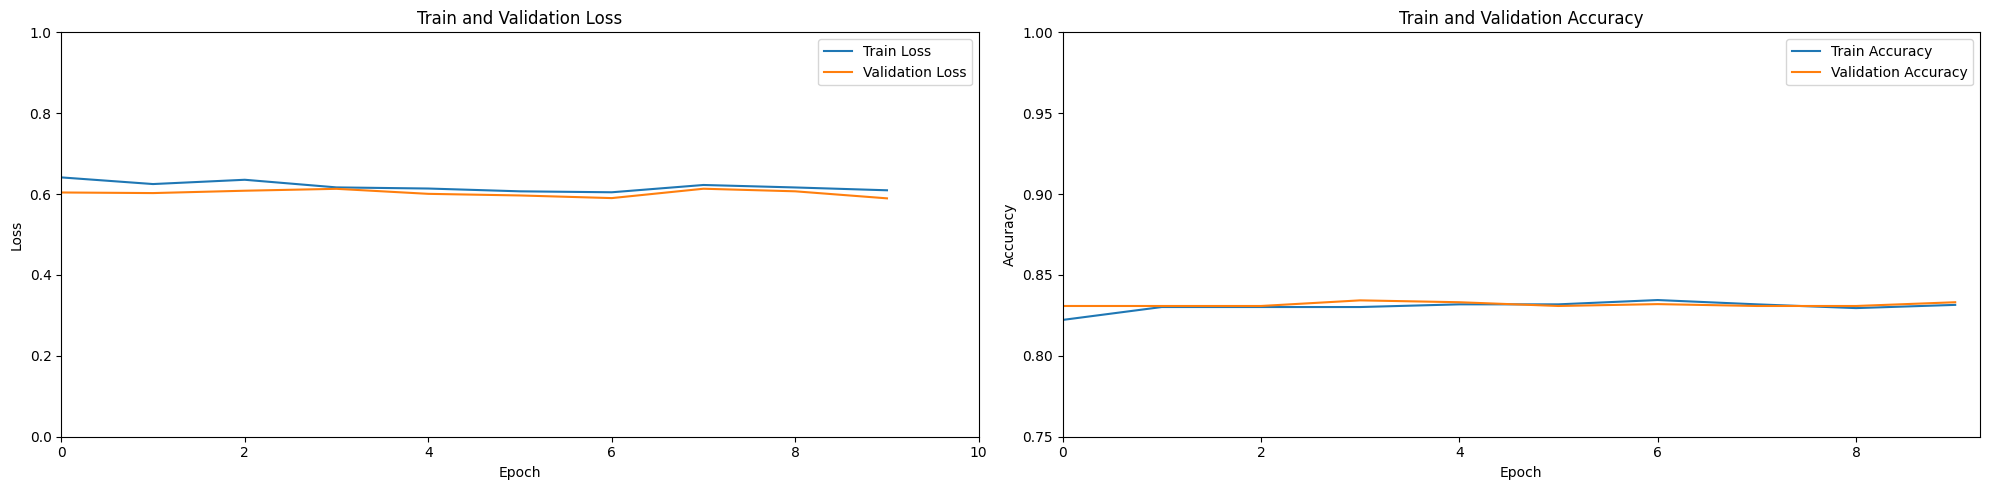

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()


In [8]:
# Save your model
model.save("peach_tree_disease_model.keras")

# If you also want to include the weights of your model, you can do this:
model.save_weights("peach_tree_disease_weights.weights.h5")


In [9]:

# Make predictions
predictions = model.predict(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


FUNCTION FOR PREDICTION OF IMAGES FROM TEST DIRECTORY (TAKES 12 IMAGES/EXECUTION)

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
def predict_images(image_paths, model, test_generator):
    predictions = []
    
    for image_path in image_paths:
        # Load and preprocess the image
        image = load_img(image_path, target_size=(img_width, img_height))  # Resize to model input size
        image_array = np.expand_dims(np.array(image), axis=0) / 255.0  # Add batch dimension and normalize
        # Make prediction using the trained model
        prediction = model.predict(image_array)
        # Get the predicted class index
        reverse_class_indices = {v: k for k, v in test_generator.class_indices.items()}
        predicted_class_index = np.argmax(prediction)
        # Get the predicted class label using the reverse mapping
        class_label = reverse_class_indices[predicted_class_index]
        # Append the predicted class label to the list of predictions
        predictions.append(class_label)

    return predictions

# Example usage
test_dir = "/kaggle/working/peach_tree_disease_dataset/test"
subfolders = [subfolder for subfolder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, subfolder))]
image_paths = []


# Loop until 12 images are collected or subfolders are exhausted
# Define the patterns to be excluded from filenames
excluded_patterns = [ "GRE","NIR","RED","REG"]

# Loop until 12 images are collected or subfolders are exhausted
for _ in range(12):
    # Randomly select a subfolder
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(test_dir, random_subfolder)
    
    # Get the list of image files in the selected subfolder
    image_files = [file for file in os.listdir(subfolder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
    
    # Filter out filenames containing excluded patterns
    filtered_files = [file for file in image_files if not any(pattern in file for pattern in excluded_patterns)]
    
    # Shuffle the list of filtered image files
    random.shuffle(filtered_files)
    
    # Check if there are valid image files in the subfolder after filtering
    if filtered_files:
        # Select one image randomly from the filtered list
        selected_image = filtered_files[0]
        image_path = os.path.join(subfolder_path, selected_image)
        image_paths.append(image_path)
# Shuffle the list of selected image paths
random.shuffle(image_paths)
# Make predictions for the randomly selected images
predicted_classes = predict_images(image_paths, model, test_generator)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


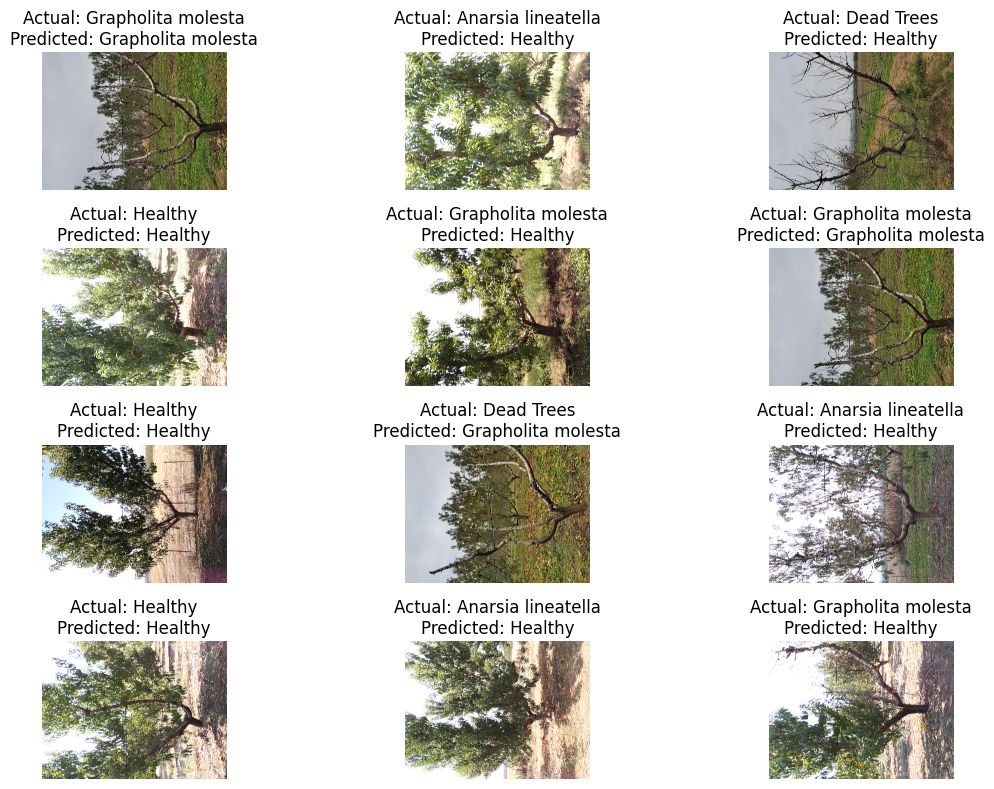

In [11]:
# Display images with actual and predicted class names
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)
    plt.subplot(4, 3, i + 1)
    plt.imshow(image )  # Set aspect='auto' to maintain aspect ratio
    plt.title(f"Actual: {os.path.basename(os.path.dirname(image_path))}\nPredicted: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
